In [189]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from google.colab import files

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# **Loading the data**

In [6]:
folder_path='/content/gdrive/My Drive/Data Science journey/Kaggle competitions/House Prices - Advanced Regression Techniques/'
file_path_train=folder_path+'train.csv'
file_path_test=folder_path+'test.csv'

print(file_path_train)
print(file_path_test)

/content/gdrive/My Drive/Data Science journey/Kaggle competitions/House Prices - Advanced Regression Techniques/train.csv
/content/gdrive/My Drive/Data Science journey/Kaggle competitions/House Prices - Advanced Regression Techniques/test.csv


In [ ]:
# connect to Google Drive
drive.mount('/content/gdrive')
open(file_path_train).read()
open(file_path_test).read()

In [9]:
df_train=pd.read_csv(file_path_train)
df_test=pd.read_csv(file_path_test)

# **Exploring the datasets**

In [13]:
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


<Axes: xlabel='SalePrice', ylabel='Count'>

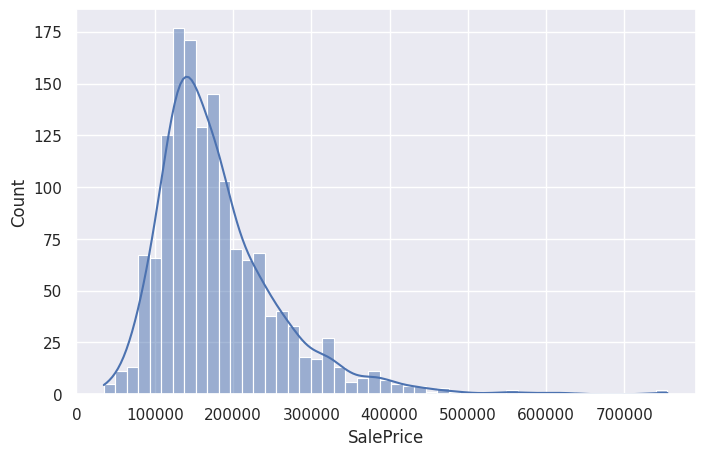

In [117]:
# let's look at the house price distribution in the training dataset
plt.figure(figsize=(8, 5))
sns.histplot(df_train['SalePrice'], kde=True)

In [14]:
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [20]:
# note that the test dataset does not have the 'SalePrice' column, which is the target we want to predict
# we can use 0 values as placeholders
if 'SalePrice' not in df_test.columns:
    df_test['SalePrice'] = 0

In [22]:
# after adding the 'SalePrice' column as a temporary placeholder
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0


In [ ]:
# merge the train and test datasets to clean and manipulate them in the same way and at the same time.

df_all=pd.concat([df_train,df_test],axis=0)

In [24]:
print(df_train.shape)
print(df_test.shape)
print(df_all.shape)

(1460, 81)
(1459, 81)
(2919, 81)


In [26]:
# set 'Id' as the index
df_all.set_index('Id',inplace=True)

# **Data preprocessing**

## **Find columns with null values**

In [28]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

Note that the number of non-null values differ among the columns, indicating the presence of null values

In [40]:
# count the number of missing values in each column
print(df_all.isnull().sum())

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [35]:
# place this information into a dataset
df_filter = df_all.isnull().sum()

# keep only the features that have at least one null value
df_filter = df_filter[df_filter > 0]
print(df_filter)

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64


In [38]:
# list the column names that contain null values
null_columns=df_filter.index
print(null_columns)

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')


In [39]:
# create a dataframe that only shows the columns with null values by filtering the original dataset
df_null=df_all[null_columns]
df_null.head(3)

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD


In [42]:
df_null.isnull()
# if a cell contains a null value gives True
# if a cell does not contain a null value, it give False

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,True,True,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
4,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,True,True,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,False,False,True,False,False,False,True,False,False,False,...,True,True,False,False,True,True,True,True,True,False
2916,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2917,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,True,True,False


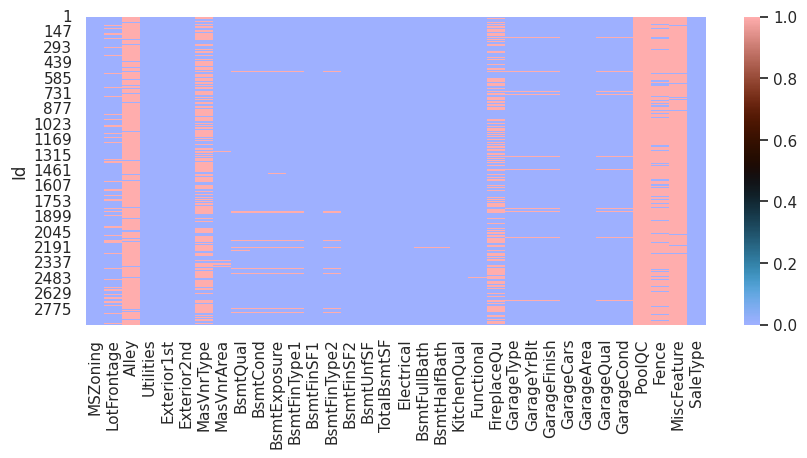

In [57]:
sns.set (rc = {'figure.figsize':(10, 4)})
sns.heatmap(df_null.isnull(), cmap='berlin')
# use a binary colormap to highlight whether a cell contain a null vaue

plt.show ()

Note that columns like 'Alley', 'MasVnrType' and 'MiscFeature' have mostly null values (more than 1000).

In [58]:
df_1000filter = df_all.isnull().sum()

df_1000filter = df_1000filter[df_1000filter > 1000]
print(df_1000filter)
print(df_1000filter.index)

Alley          2721
MasVnrType     1766
FireplaceQu    1420
PoolQC         2909
Fence          2348
MiscFeature    2814
dtype: int64
Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [59]:
# let's drop all the columns with too many missing values

df_all.drop(columns=df_1000filter.index,inplace=True)
df_all.shape

(2919, 74)

the number of columns dropped from 80 to 74.

## **split numerical columns and categorical columns**

The data has now 37 numerical columns and 37 categorical columns.

In [61]:
df_all.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,90491.588215
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,106496.379333
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,34900.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,163000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [60]:
df_all.describe(include='object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,2915,2919,2919,2919,2917,2919,2919,2919,2919,2919,...,2918,2918,2917,2762,2760,2760,2760,2919,2918,2919
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,2265,2907,1859,2622,2916,2133,2778,443,2511,2889,...,2671,1492,2717,1723,1230,2604,2654,2641,2525,2402


In [154]:
# split
df_cat = df_all[df_all.select_dtypes(include=['object']).columns]

In [155]:
# create dataframe with only numerical columns
df_num = df_all[df_all.select_dtypes(include=['int64','float64']).columns]

## **missing values in categorical columns**

In [156]:
# replace the NaN values with 'null'
df_cat = df_cat.fillna('null')

# one hot encoding
df_cat_encoded = pd.get_dummies(df_cat)

In [157]:
# show the addition of the 'null' categories in one representative column
df_cat['MSZoning'].value_counts()

,count
MSZoning,
RL,2265
RM,460
FV,139
RH,26
C (all),25
null,4


In [158]:
df_cat_encoded.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_null,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_null,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False


## **missing values in numerical columns**

in this section, we will replace the missing values with the mean value of the column.

In [169]:
# find the mean value in each column
print(df_num.mean())

MSSubClass          57.137718
LotFrontage         69.305795
LotArea          10168.114080
OverallQual          6.089072
OverallCond          5.564577
YearBuilt         1971.312778
YearRemodAdd      1984.264474
MasVnrArea         102.201312
BsmtFinSF1         441.423235
BsmtFinSF2          49.582248
BsmtUnfSF          560.772104
TotalBsmtSF       1051.777587
1stFlrSF          1159.581706
2ndFlrSF           336.483727
LowQualFinSF         4.694416
GrLivArea         1500.759849
BsmtFullBath         0.429894
BsmtHalfBath         0.061364
FullBath             1.568003
HalfBath             0.380267
BedroomAbvGr         2.860226
KitchenAbvGr         1.044536
TotRmsAbvGrd         6.451524
Fireplaces           0.597122
GarageYrBlt       1978.113406
GarageCars           1.766621
GarageArea         472.874572
WoodDeckSF          93.709832
OpenPorchSF         47.486811
EnclosedPorch       23.098321
3SsnPorch            2.602261
ScreenPorch         16.062350
PoolArea             2.251799
MiscVal   

In [170]:
# replace missing values with the mean value of their respective column
df_num = df_num.fillna(df_num.mean())

In [171]:
# check the number of missing values in each column (should be 0)
print(df_num.isnull().sum())

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


## **prepare data for training and testing**

In [172]:
# merge the categorical and numerical columns after preprocessing
new_df_all=pd.concat([df_num,df_cat_encoded],axis=1)
print(df_num.shape)
print(df_cat_encoded.shape)
print(new_df_all.shape)

(2919, 37)
(2919, 247)
(2919, 284)


In [173]:
# split the processed data into train and test datasets
train_data = new_df_all.iloc[0:len(df_train)]
test_data = new_df_all.iloc[len(df_train):]

In [174]:
# remove the target column from the test dataset
test_data = test_data.drop(columns='SalePrice')

In [175]:
print(train_data.shape)
print(test_data.shape)

(1460, 284)
(1459, 283)


SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
BsmtQual_Ex         0.553105
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
KitchenQual_Ex      0.504094
Foundation_PConc    0.497734
MasVnrArea          0.475210
GarageYrBlt         0.471062
Fireplaces          0.466929
ExterQual_Gd        0.452466
ExterQual_Ex        0.451164
BsmtFinType1_GLQ    0.434597
Name: SalePrice, dtype: float64


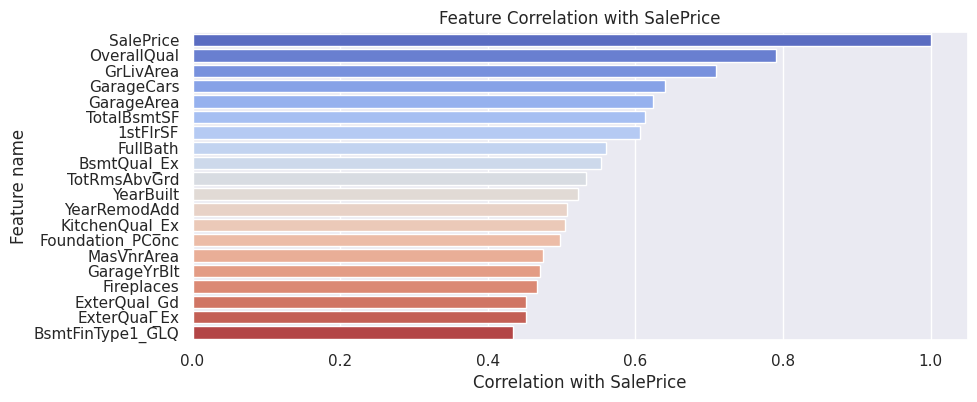

In [217]:
corr = train_data.corr()['SalePrice'].sort_values(ascending=False).head(20)
print(corr)

# plot
sns.barplot(x=corr.values, y=corr.index, hue=corr.index, palette='coolwarm')
plt.xlabel('Correlation with SalePrice')
plt.ylabel('Feature name')
plt.title('Feature Correlation with SalePrice')
plt.show()

# **ML modeling**

In [176]:
# features
X=train_data.drop(columns='SalePrice')

# target
y=train_data['SalePrice']

In [177]:
# further split the data for validation before training begins to find the best model to implement on test data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
# reshape target lists into 2D arrays as required by certain models
y_train = np.reshape(y_train,(-1, 1))
y_val = np.reshape(y_val,(-1, 1))
# print
X_train.shape, y_train.shape

((1168, 283), (1168, 1))

## **Model 1: Linear Regression**

In [179]:
linreg=LinearRegression()
linreg.fit(X, y)

# make predictions on validation set
linreg_pred=linreg.predict(X_val)

# evaluate the accuracy
mae=mean_absolute_error(y_val,linreg_pred)
print("The mean absolute error is ",np.round(mae, decimals=2))
mse=mean_squared_error(y_val,linreg_pred)
print("The mean squared error is ", np.round(mse, decimals=2))

The mean absolute error is  14411.57
The mean squared error is  529359534.67


Text(0.5, 1.0, 'Linear Regression')

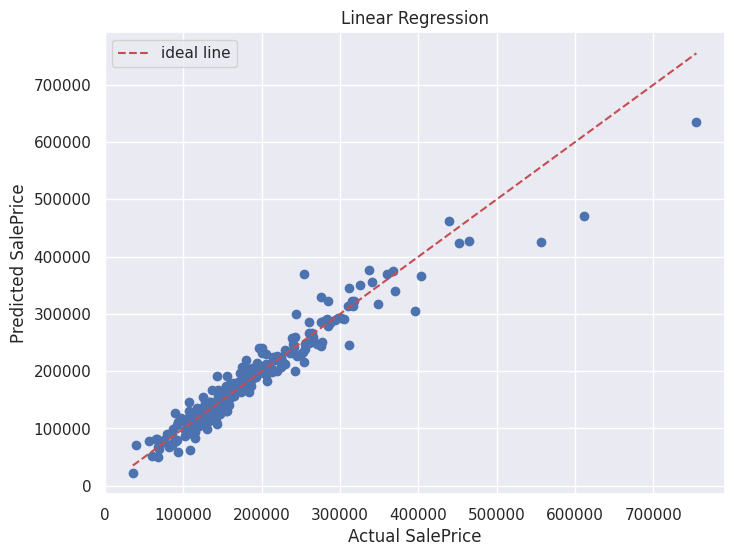

In [180]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, linreg_pred)

# ideal line plotting
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--', label='ideal line')

# plot labels
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.legend()
plt.title('Linear Regression')

## **Model 2: Extreme Gradient Boosting Regressor**

In [181]:
xgb=XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
xgb.fit(X, y)

xgb_pred=xgb.predict(X_val)

# evaluate the accuracy
mae=mean_absolute_error(y_val,xgb_pred)
print("The mean absolute error is ",np.round(mae, decimals=2))
mse=mean_squared_error(y_val,xgb_pred)
print("The mean squared error is ", np.round(mse, decimals=2))

The mean absolute error is  39.97
The mean squared error is  5245.51


Text(0.5, 1.0, 'XGBRegressor')

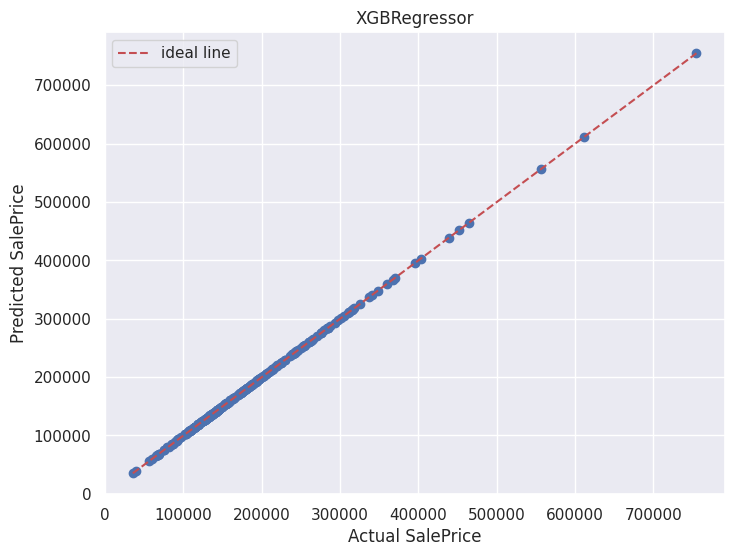

In [182]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, xgb_pred)

# ideal line plotting
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--', label='ideal line')

# plot labels
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.legend()
plt.title('XGBRegressor')

## **Model 3: Random Forest Regressor**

In [183]:
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(X, y)

rfr_pred=rfr.predict(X_val)

# evaluate the accuracy
mae=mean_absolute_error(y_val,rfr_pred)
print("The mean absolute error is ",np.round(mae, decimals=2))
mse=mean_squared_error(y_val,rfr_pred)
print("The mean squared error is ", np.round(mse, decimals=2))

The mean absolute error is  6478.21
The mean squared error is  113269969.11


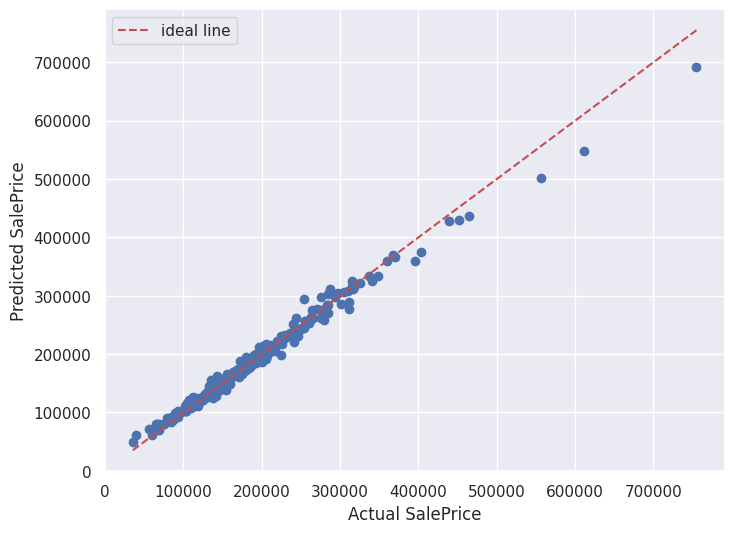

In [184]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, rfr_pred)

# ideal line plotting
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--', label='ideal line')

# plot labels
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.legend()
plt.show()

# **ML predictions**

Based on the accuracy of the three model fitted, the Extreme Gradient Boosting Regressor is the model that performs the best on the training data.

In [185]:
predictions=xgb.predict(test_data)

In [191]:
final_sub = pd.DataFrame()
final_sub['Id'] = test_data.index
final_sub['SalePrice'] = predictions

# Write DataFrame to a CSV file without index
file_name='final_submission.csv'
final_sub.to_csv(file_name, index=False)

In [192]:
# download CSV file
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Feature importances**

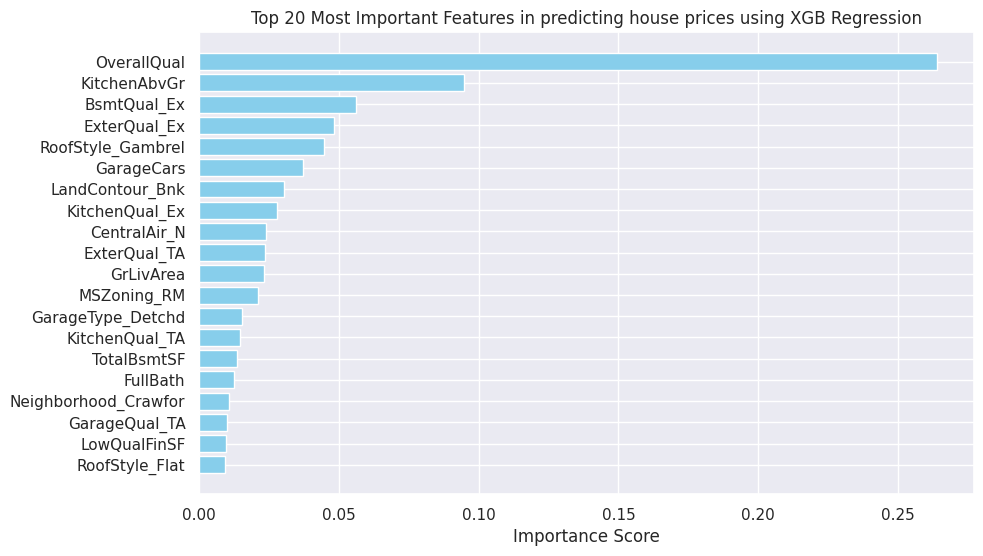

In [195]:
# Get feature importances
importances = xgb.feature_importances_

# If using DataFrame
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

# Plotting
N = 20  # Change this number to display more or fewer features
top_features = importance_df.head(N)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title(f'Top {N} Most Important Features in predicting house prices using XGB Regression')
plt.xlabel('Importance Score')
plt.show()

According to the feature ranking, OverallQual (overall material and finish quality) is the feature that mostly impacts the house selling price.

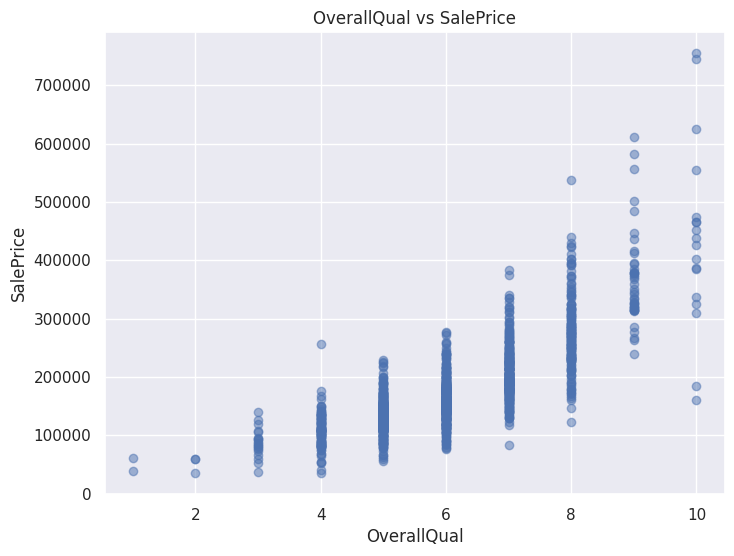

In [198]:
x_qual=train_data['OverallQual']
y_price=train_data['SalePrice']

plt.figure(figsize=(8, 6))
plt.scatter(x_qual, y_price, alpha=0.5)
plt.title('OverallQual vs SalePrice')

# plot labels
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()